## View

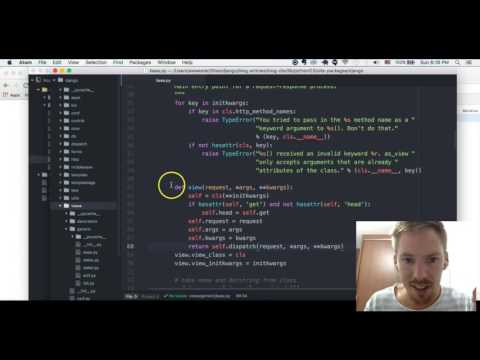

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('04z8TXH-t2c',width=600, height=400)

[full django Base.py script](https://gist.github.com/guinslym/6b1ff53ca3d55a842ae99d04133c211f)

### Example

```python
class RegionUpdate(UpdateView):
    http_method_names = ['post']
    model = Region
    form_class = RegionForm
    fields = ['name', 'geographies', 'description', 'privacy']
```

[source](https://github.com/PresenceHealth/HealthViz/blob/9c9ad0a3ed921338585cb6f9c2048e966e4df701/geo/views.py#L266)
#### Using Dispatch
 to check if a user is logged in. But it's better to use Django-braces. 7:30min
```python
class RegionUpdate(UpdateView):
    model = Region
    fields = ['name', 'geographies', 'description', 'privacy']
    
    @method_decorator(login_required)
    def dispatch(self, *args, **kwargs):
        object = super(RegionUpdate, self).get_object()
        if object.added_by != self.request.user:
            raise Http404('You do not have permission to edit this region.')
        return super(RegionUpdate, self).dispatch(*args, **kwargs)
```

[source](https://github.com/suchov/into_to_dj/blob/5e27a8cc404604ae20a76d1451d2c3098617a4a5/readit/books/views.py)


#### Redifine an http_method_names
```python
from django.db.models import Count
from django.shortcuts import render
from django.views.generic import View
from .models import Book, Author


class AuthorList(View):
    def get(self, request):

        authors = Author.objects.annotate(
            published_books=Count('books')
        ).filter(
            published_books__gt=0
        )

        context = {
            'authors': authors,
        }
        return render(request, "authors.html", context)
        
```